# Dataset preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(0)

In [3]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [4]:
train_data=pd.read_csv("NSL-KDD\KDDTrain+.txt",header=None,names=col_names)
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [5]:
train_data.drop(['difficulty_level'],axis=1,inplace=True)

In [6]:
train_data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [7]:
train_data.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],
                 'Dos',inplace=True)
train_data.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack',
                  'snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
train_data.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
train_data.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [8]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [9]:
train_data.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

## Normalizing the numeric data

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
numeric_col = train_data.select_dtypes(include='number').columns

In [12]:
std_scaler = StandardScaler()
for i in numeric_col:
    arr=np.array(train_data[i])
    train_data[i]=std_scaler.fit_transform(arr.reshape(len(arr),1))    

In [13]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.972455,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos


## One-hot encoding the categorical data

In [14]:
cat_col = ['protocol_type','service','flag']

In [15]:
categorical=train_data[cat_col]
categorical

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF
...,...,...,...
125968,tcp,private,S0
125969,udp,private,SF
125970,tcp,smtp,SF
125971,tcp,klogin,S0


In [16]:
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Multi-class Classification

In [17]:
multi_data = train_data.copy()
multi_label = pd.DataFrame(multi_data.label)

In [18]:
from sklearn import preprocessing

In [19]:
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label

In [20]:
multi_data = pd.get_dummies(multi_data,columns=['label'],prefix="",prefix_sep="") 
multi_data['label'] = multi_label
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.224532,-0.376387,4,0,0,0,0,1,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.602433,-0.387635,-0.345084,4,0,0,0,0,1,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.387635,-0.376387,4,0,0,0,0,1,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.624871,-0.355014,-0.376387,4,0,0,0,0,1,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,1.618955,-0.387635,-0.376387,0,1,0,0,0,0,Dos


In [21]:
import matplotlib.pyplot as plt

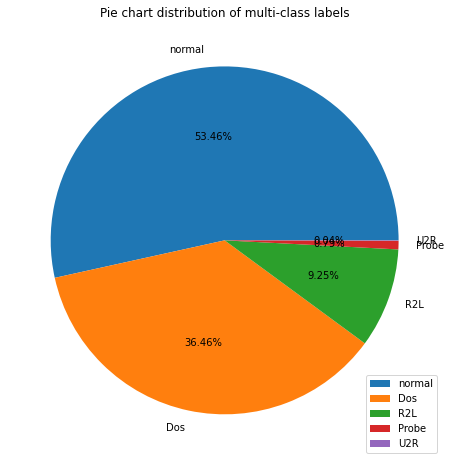

In [22]:
plt.figure(figsize=(8,8))
plt.pie(multi_data.label.value_counts(),labels=multi_data.label.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.show()

# Feature Extraction

In [23]:
numeric_multi = multi_data[numeric_col]
numeric_multi['intrusion'] = multi_data['intrusion']

C:\Users\getch\AppData\Local\Temp\ipykernel_24772\597325382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_multi['intrusion'] = multi_data['intrusion']


In [24]:
corr = numeric_multi.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

count                       0.613251
logged_in                   0.693770
srv_serror_rate             0.710852
serror_rate                 0.712861
dst_host_serror_rate        0.714247
dst_host_same_srv_rate      0.716820
dst_host_srv_serror_rate    0.717387
dst_host_srv_count          0.718579
same_srv_rate               0.798358
intrusion                   1.000000
Name: intrusion, dtype: float64

In [25]:
numeric_multi = multi_data[['count','logged_in','srv_serror_rate','serror_rate','dst_host_serror_rate',
                        'dst_host_same_srv_rate','dst_host_srv_serror_rate','dst_host_srv_count','same_srv_rate']]
numeric_multi = numeric_multi.join(categorical)
multi_data = numeric_multi.join(multi_data[['intrusion','Dos','Probe','R2L','U2R','normal','label']])

In [26]:
multi_data.to_csv('multi_data.csv')

In [27]:
multi_data.drop(multi_data.columns[0],axis=1,inplace=True)

In [28]:
multi_data

,logged_in,srv_serror_rate,serror_rate,dst_host_serror_rate,dst_host_same_srv_rate,dst_host_srv_serror_rate,dst_host_srv_count,same_srv_rate,protocol_type_icmp,protocol_type_tcp,...,flag_S3,flag_SF,flag_SH,intrusion,Dos,Probe,R2L,U2R,normal,label
0,-0.809262,-0.631929,-0.637209,-0.639532,-0.782367,-0.624871,-0.818890,0.771283,0,1,...,0,1,0,4,0,0,0,0,1,normal
1,-0.809262,-0.631929,-0.637209,-0.639532,-1.161030,-0.624871,-1.035688,-1.321428,0,0,...,0,1,0,4,0,0,0,0,1,normal
2,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.809857,-1.389669,0,1,...,0,0,0,0,1,0,0,0,0,Dos
3,1.235694,-0.184522,-0.189235,-0.572083,1.066401,-0.602433,1.258754,0.771283,0,1,...,0,1,0,4,0,0,0,0,1,normal
4,1.235694,-0.631929,-0.637209,-0.639532,1.066401,-0.624871,1.258754,0.771283,0,1,...,0,1,0,4,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.809262,1.605104,1.602664,1.608759,-0.938287,1.618955,-0.818890,-1.184947,0,1,...,0,0,0,0,1,0,0,0,0,Dos
125969,-0.809262,-0.631929,-0.637209,-0.639532,0.977304,-0.624871,1.159389,0.771283,0,0,...,0,1,0,4,0,0,0,0,1,normal
125970,1.235694,-0.631929,-0.637209,0.979238,-0.893738,-0.624871,-0.773724,0.771283,0,1,...,0,1,0,4,0,0,0,0,1,normal
125971,-0.809262,1.605104,1.602664,1.608759,-1.094207,1.618955,-0.972455,-1.366922,0,1,...,0,0,0,0,1,0,0,0,0,Dos


In [29]:
X=multi_data.iloc[:,0:92]
Y=multi_data[['Dos','normal','Probe','R2L','U2R']]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_tr,X_te,y_tr,y_te=train_test_split(X,Y,test_size=0.25,random_state=42)

# Auto-encoder

In [32]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
input_layer = Input(shape=(92,))
encoder = Dense(46, activation="relu")(input_layer)
encoder = Dense(23, activation="relu")(encoder)
decoder = Dense(23, activation="relu")(encoder)
decoder = Dense(46, activation="relu")(decoder)
decoder = Dense(92, activation="relu")(decoder)
dense = Dense(46, activation="relu")(decoder)
dense = Dense(23, activation="relu")(decoder)
dense = Dense(12, activation="relu")(decoder)
output_layer = Dense(5, activation="softmax")(decoder)

model = Model(inputs=input_layer, outputs=output_layer)
# autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [34]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 92)]              0         
                                                                 
 dense (Dense)               (None, 46)                4278      
                                                                 
 dense_1 (Dense)             (None, 23)                1081      
                                                                 
 dense_2 (Dense)             (None, 23)                552       
                                                                 
 dense_3 (Dense)             (None, 46)                1104      
                                                                 
 dense_4 (Dense)             (None, 92)                4324      
                                                                 
 dense_8 (Dense)             (None, 5)                 465   

In [35]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad

def fitness_func(solution, sol_idx):
    
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model, weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)

    cce = tensorflow.keras.losses.MeanSquaredError()
    solution_fitness = 1.0 / (cce(data_outputs, predictions).numpy() + 0.00000001)

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Fitness values    = {fitness}".format(fitness=ga_instance.best_solution()))    

In [36]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping


keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

# Data inputs
data_inputs = X_tr

# Data outputs
data_outputs = y_tr


num_generations = 600
num_parents_mating = 5
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)

ga_instance.run()

Generation = 1
Fitness    = 6.220740754899071
Fitness values    = (array([ 0.19775079, -0.05642058, -0.02342317, ...,  0.        ,
        0.        ,  0.        ]), 6.220740754899071, 0)
Generation = 2
Fitness    = 6.220740754899071
Fitness values    = (array([ 0.19775079, -0.05642058, -0.02342317, ...,  0.        ,
        0.        ,  0.        ]), 6.220740754899071, 0)
Generation = 3
Fitness    = 6.220740754899071
Fitness values    = (array([ 0.19775079, -0.05642058, -0.02342317, ...,  0.        ,
        0.        ,  0.        ]), 6.220740754899071, 0)
Generation = 4
Fitness    = 8.433419850193694
Fitness values    = (array([ 0.56812336, -0.05642058, -0.02342317, ...,  0.        ,
        0.        ,  0.        ]), 8.433419850193694, 6)
Generation = 5
Fitness    = 8.433419850193694
Fitness values    = (array([ 0.56812336, -0.05642058, -0.02342317, ...,  0.        ,
        0.        ,  0.        ]), 8.433419850193694, 0)
Generation = 6
Fitness    = 8.433419850193694
Fitness values

Fitness values    = (array([ 0.19775079, -0.05642058, -0.02342317, ...,  0.        ,
        0.        , -0.43753109]), 15.037916747592156, 0)
Generation = 45
Fitness    = 15.037916747592156
Fitness values    = (array([ 0.19775079, -0.05642058, -0.02342317, ...,  0.        ,
        0.        , -0.43753109]), 15.037916747592156, 0)
Generation = 46
Fitness    = 15.037916747592156
Fitness values    = (array([ 0.19775079, -0.05642058, -0.02342317, ...,  0.        ,
        0.        , -0.43753109]), 15.037916747592156, 0)
Generation = 47
Fitness    = 15.037916747592156
Fitness values    = (array([ 0.19775079, -0.05642058, -0.02342317, ...,  0.        ,
        0.        , -0.43753109]), 15.037916747592156, 0)
Generation = 48
Fitness    = 15.037916747592156
Fitness values    = (array([ 0.19775079, -0.05642058, -0.02342317, ...,  0.        ,
        0.        , -0.43753109]), 15.037916747592156, 0)
Generation = 49
Fitness    = 15.037916747592156
Fitness values    = (array([ 0.19775079, -0.0

Fitness values    = (array([ 0.19775079, -0.05642058, -0.02342317, ...,  0.        ,
        0.        , -0.43753109]), 15.037916747592156, 0)
Generation = 88
Fitness    = 15.037916747592156
Fitness values    = (array([ 0.19775079, -0.05642058, -0.02342317, ...,  0.        ,
        0.        , -0.43753109]), 15.037916747592156, 0)
Generation = 89
Fitness    = 15.037916747592156
Fitness values    = (array([ 0.19775079, -0.05642058, -0.02342317, ...,  0.        ,
        0.        , -0.43753109]), 15.037916747592156, 0)
Generation = 90
Fitness    = 15.037916747592156
Fitness values    = (array([ 0.19775079, -0.05642058, -0.02342317, ...,  0.        ,
        0.        , -0.43753109]), 15.037916747592156, 0)
Generation = 91
Fitness    = 15.037916747592156
Fitness values    = (array([ 0.19775079, -0.05642058, -0.02342317, ...,  0.        ,
        0.        , -0.43753109]), 15.037916747592156, 0)
Generation = 92
Fitness    = 15.037916747592156
Fitness values    = (array([ 0.19775079, -0.0

Generation = 130
Fitness    = 15.230981352603115
Fitness values    = (array([ 0.19775079, -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 15.230981352603115, 0)
Generation = 131
Fitness    = 15.230981352603115
Fitness values    = (array([ 0.19775079, -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 15.230981352603115, 0)
Generation = 132
Fitness    = 15.230981352603115
Fitness values    = (array([ 0.19775079, -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 15.230981352603115, 0)
Generation = 133
Fitness    = 15.230981352603115
Fitness values    = (array([ 0.19775079, -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 15.230981352603115, 0)
Generation = 134
Fitness    = 15.230981352603115
Fitness values    = (array([ 0.19775079, -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 15.230981352603115, 0)
Generation = 135
Fitness    = 15.2309813

Generation = 173
Fitness    = 16.109112039182445
Fitness values    = (array([ 0.89197853, -0.05642058, -0.02342317, ...,  0.18734898,
       -0.61358983, -0.43753109]), 16.109112039182445, 0)
Generation = 174
Fitness    = 16.109112039182445
Fitness values    = (array([ 0.89197853, -0.05642058, -0.02342317, ...,  0.18734898,
       -0.61358983, -0.43753109]), 16.109112039182445, 0)
Generation = 175
Fitness    = 16.109112039182445
Fitness values    = (array([ 0.89197853, -0.05642058, -0.02342317, ...,  0.18734898,
       -0.61358983, -0.43753109]), 16.109112039182445, 0)
Generation = 176
Fitness    = 16.109112039182445
Fitness values    = (array([ 0.89197853, -0.05642058, -0.02342317, ...,  0.18734898,
       -0.61358983, -0.43753109]), 16.109112039182445, 0)
Generation = 177
Fitness    = 16.109112039182445
Fitness values    = (array([ 0.89197853, -0.05642058, -0.02342317, ...,  0.18734898,
       -0.61358983, -0.43753109]), 16.109112039182445, 0)
Generation = 178
Fitness    = 16.1091120

Generation = 216
Fitness    = 16.109112039182445
Fitness values    = (array([ 0.89197853, -0.05642058, -0.02342317, ...,  0.18734898,
       -0.61358983, -0.43753109]), 16.109112039182445, 0)
Generation = 217
Fitness    = 16.109112039182445
Fitness values    = (array([ 0.89197853, -0.05642058, -0.02342317, ...,  0.18734898,
       -0.61358983, -0.43753109]), 16.109112039182445, 0)
Generation = 218
Fitness    = 16.109112039182445
Fitness values    = (array([ 0.89197853, -0.05642058, -0.02342317, ...,  0.18734898,
       -0.61358983, -0.43753109]), 16.109112039182445, 0)
Generation = 219
Fitness    = 16.109112039182445
Fitness values    = (array([ 0.89197853, -0.05642058, -0.02342317, ...,  0.18734898,
       -0.61358983, -0.43753109]), 16.109112039182445, 0)
Generation = 220
Fitness    = 16.109112039182445
Fitness values    = (array([ 0.89197853, -0.05642058, -0.02342317, ...,  0.18734898,
       -0.61358983, -0.43753109]), 16.109112039182445, 0)
Generation = 221
Fitness    = 16.1091120

Generation = 259
Fitness    = 17.453267572923227
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.453267572923227, 0)
Generation = 260
Fitness    = 17.453267572923227
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.453267572923227, 0)
Generation = 261
Fitness    = 17.453267572923227
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.453267572923227, 0)
Generation = 262
Fitness    = 17.453267572923227
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.453267572923227, 0)
Generation = 263
Fitness    = 17.453267572923227
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.453267572923227, 0)
Generation = 264
Fitness    = 17.4532675

Generation = 302
Fitness    = 17.453267572923227
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.453267572923227, 0)
Generation = 303
Fitness    = 17.453267572923227
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.453267572923227, 0)
Generation = 304
Fitness    = 17.453267572923227
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.453267572923227, 0)
Generation = 305
Fitness    = 17.453267572923227
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.453267572923227, 0)
Generation = 306
Fitness    = 17.453267572923227
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.453267572923227, 0)
Generation = 307
Fitness    = 17.4532675

Generation = 345
Fitness    = 17.453267572923227
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.453267572923227, 0)
Generation = 346
Fitness    = 17.453267572923227
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.453267572923227, 0)
Generation = 347
Fitness    = 17.453267572923227
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.453267572923227, 0)
Generation = 348
Fitness    = 17.453267572923227
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.453267572923227, 0)
Generation = 349
Fitness    = 17.453267572923227
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.453267572923227, 0)
Generation = 350
Fitness    = 17.4532675

Generation = 388
Fitness    = 17.453267572923227
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.453267572923227, 0)
Generation = 389
Fitness    = 17.453267572923227
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.453267572923227, 0)
Generation = 390
Fitness    = 17.453267572923227
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.453267572923227, 0)
Generation = 391
Fitness    = 17.453267572923227
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.453267572923227, 0)
Generation = 392
Fitness    = 17.453267572923227
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.453267572923227, 0)
Generation = 393
Fitness    = 17.4532675

Generation = 431
Fitness    = 17.614633645646347
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.65689424, -0.60225502]), 17.614633645646347, 0)
Generation = 432
Fitness    = 17.614633645646347
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.65689424, -0.60225502]), 17.614633645646347, 0)
Generation = 433
Fitness    = 17.614633645646347
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.65689424, -0.60225502]), 17.614633645646347, 0)
Generation = 434
Fitness    = 17.614633645646347
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.65689424, -0.60225502]), 17.614633645646347, 0)
Generation = 435
Fitness    = 17.614633645646347
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.65689424, -0.60225502]), 17.614633645646347, 0)
Generation = 436
Fitness    = 17.6146336

Generation = 474
Fitness    = 17.614748077087473
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.65689424, -0.60225502]), 17.614748077087473, 0)
Generation = 475
Fitness    = 17.614748077087473
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.65689424, -0.60225502]), 17.614748077087473, 0)
Generation = 476
Fitness    = 17.614748077087473
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.65689424, -0.60225502]), 17.614748077087473, 0)
Generation = 477
Fitness    = 17.614748077087473
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.65689424, -0.60225502]), 17.614748077087473, 0)
Generation = 478
Fitness    = 17.898601789757887
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 17.898601789757887, 6)
Generation = 479
Fitness    = 17.8986017

Generation = 517
Fitness    = 18.449121914673857
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 18.449121914673857, 0)
Generation = 518
Fitness    = 18.449121914673857
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 18.449121914673857, 0)
Generation = 519
Fitness    = 18.449121914673857
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 18.449121914673857, 0)
Generation = 520
Fitness    = 18.449121914673857
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 18.449121914673857, 0)
Generation = 521
Fitness    = 18.449121914673857
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 18.449121914673857, 0)
Generation = 522
Fitness    = 18.4491219

Generation = 560
Fitness    = 18.449121914673857
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 18.449121914673857, 0)
Generation = 561
Fitness    = 18.449121914673857
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 18.449121914673857, 0)
Generation = 562
Fitness    = 18.449121914673857
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 18.449121914673857, 0)
Generation = 563
Fitness    = 18.449121914673857
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 18.449121914673857, 0)
Generation = 564
Fitness    = 19.076962034224984
Fitness values    = (array([ 1.1266036 , -0.05642058, -0.02342317, ...,  0.        ,
       -0.61358983, -0.43753109]), 19.076962034224984, 6)
Generation = 565
Fitness    = 19.0769620

C:\Users\getch\AppData\Local\Programs\Python\Python39\lib\site-packages\pygad\pygad.py:3142: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


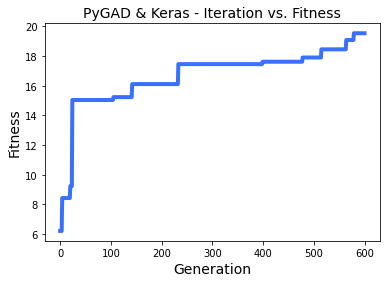

Fitness value of the best solution = 19.533239243116963
Index of the best solution : 0
Predictions : 
 [[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.8793802e-25]]
Categorical Crossentropy :  2.0485866
Accuracy :  0.87188685


In [37]:
ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model, weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
print("Predictions : \n", predictions)

# Calculate the categorical crossentropy for the trained model.
cce = tensorflow.keras.losses.CategoricalCrossentropy()
print("Categorical Crossentropy : ", cce(data_outputs, predictions).numpy())

# Calculate the classification accuracy for the trained model.
ca = tensorflow.keras.metrics.CategoricalAccuracy()
ca.update_state(data_outputs, predictions)
accuracy = ca.result().numpy()
print("Accuracy : ", accuracy)

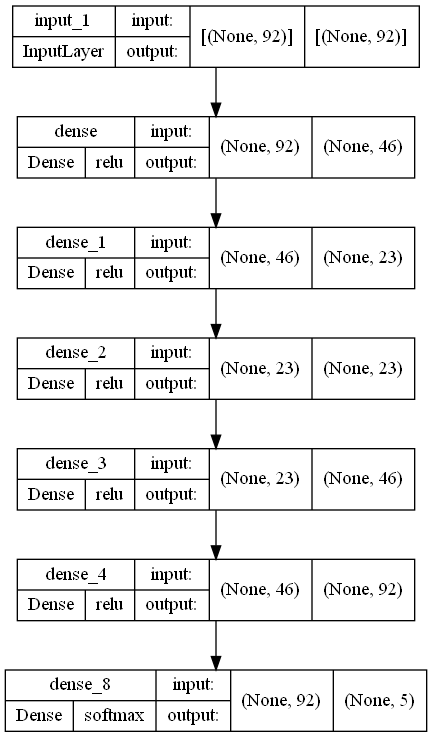

In [38]:
plot_model(model, to_file="autoencoder.png",show_shapes=True,show_layer_activations=True)

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
es=EarlyStopping(monitor="val_accuracy",patience=5,mode="max",restore_best_weights=True,verbose=1)

In [42]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [43]:
history_1=model.fit(X_tr,y_tr,validation_split=0.2,batch_size=500,epochs=100,callbacks=[es])

Epoch 1/100
152/152 [==============================] - 2s 7ms/step - loss: 0.0489 - accuracy: 0.8777 - val_loss: 0.0472 - val_accuracy: 0.8820
Epoch 2/100
152/152 [==============================] - 1s 7ms/step - loss: 0.0481 - accuracy: 0.8797 - val_loss: 0.0470 - val_accuracy: 0.8826
Epoch 3/100
152/152 [==============================] - 1s 7ms/step - loss: 0.0478 - accuracy: 0.8805 - val_loss: 0.0459 - val_accuracy: 0.8851
Epoch 4/100
152/152 [==============================] - 1s 7ms/step - loss: 0.0448 - accuracy: 0.8879 - val_loss: 0.0400 - val_accuracy: 0.9000
Epoch 5/100
152/152 [==============================] - 1s 7ms/step - loss: 0.0408 - accuracy: 0.8979 - val_loss: 0.0395 - val_accuracy: 0.9012
Epoch 6/100
152/152 [==============================] - 1s 7ms/step - loss: 0.0403 - accuracy: 0.8991 - val_loss: 0.0390 - val_accuracy: 0.9024
Epoch 7/100
152/152 [==============================] - 1s 7ms/step - loss: 0.0399 - accuracy: 0.9003 - val_loss: 0.0387 - val_accuracy: 0.9031

In [44]:
y_pr_1=model.predict(X_te)
y_pr_1=np.argmax(y_pr_1, axis=1)
y_te=y_te.to_numpy()
y_te=np.argmax(y_te,axis=1)

In [45]:
print(accuracy_score(y_te,y_pr_1))

0.9418619419571982


In [46]:
print(confusion_matrix(y_te,y_pr_1))

[[11044   264   176     0     0]
 [   54 16628    92     0     0]
 [  726   230  1991     0     0]
 [    2   271     1     0     0]
 [    0    15     0     0     0]]


In [47]:
print(classification_report(y_te,y_pr_1,target_names=['Dos','normal','Probe','R2L','U2R']))

              precision    recall  f1-score   support

         Dos       0.93      0.96      0.95     11484
      normal       0.96      0.99      0.97     16774
       Probe       0.88      0.68      0.76      2947
         R2L       0.00      0.00      0.00       274
         U2R       0.00      0.00      0.00        15

    accuracy                           0.94     31494
   macro avg       0.55      0.53      0.54     31494
weighted avg       0.93      0.94      0.94     31494



C:\Users\getch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\getch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\getch\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [49]:
model.save("autoencoder_genetic.h5")